In [65]:
import json
import numpy as np
import matplotlib.pyplot as plt
import re

In [66]:
def extract_run_time(trial):
    for line in trial.split('\n'):
        if 'Test took' in line:
            time_str = re.findall("\d+\.\d+", line)[0]
            time = float(time_str)
            minutes = 0
            if not line.find('m') == -1 and line.find('ms') == -1:
                minutes = float(line[line.find('m') - 1:line.find('m')]) * 60_000
            # compute units
            unit = line[10 + len(time_str):]
            if unit == 's':
                time *= 1000
            if unit == 'us':
                time /= 1000
            return time + minutes
    return 0.0


def extract_experiments(file_name):
    result = {}
    with open(file_name) as f:
        parsed_json = json.load(f)
        for expt in parsed_json.keys():
            trials = parsed_json[expt]
            trial_times = []
            for trial in trials:
                trial_times.append(extract_run_time(trial))
            avg = np.average(np.array(trial_times))
            result[expt] = avg

    return result


def aggregate_experiment(paxos_expts, mencius_expts, bug_mencius_expts, epaxos_expts):
    aggregate_expts = {}
    # Assumes each expriment shares the same key
    for expt in paxos_expts.keys():
        paxos_avg = paxos_expts[expt]
        mencius_avg = mencius_expts[expt]
        bug_mencius_avg = bug_mencius_expts[expt]
        epaxos_avg = epaxos_expts[expt]

        aggregate_expts[expt] = ([paxos_avg, mencius_avg, bug_mencius_avg, epaxos_avg], ["paxos", "mencius", "LAMBS", "epaxos"])
    
    return aggregate_expts



In [71]:
def plot_expt(axes, i, j, row, col, aggregate_expts):
    (expt_avgs, expt_labels) = aggregate_expts[str(col) + "," + str(row)]

    # Define a list of colors for the bars
    colors = ['blue', 'green', 'red', "orange"]

    # Create the bar plot
    # plt.figure(figsize=(8, 6))  # Adjust figure size as desired
    axes[i, j].bar(expt_labels, expt_avgs, color=colors)

    axes[i, j].set_title(f"C:{col}, W:{row}")

    # Set x-axis tick positions to center bars
    axes[i, j].set_xticklabels(expt_labels, rotation=0)  # Adjust rotation for long labels


def plot_eval(paxos_fn, mencius_fn, lambs_fn, epaxos_fn):
    # Extract experiment data for all protocols
    paxos_expts = extract_experiments(paxos_fn)
    mencius_expts = extract_experiments(mencius_fn)
    bug_mencius_expts = extract_experiments(lambs_fn)
    epaxos_expts = extract_experiments(epaxos_fn)


    # aggregate different expts into format for plotting
    aggregate_expts = aggregate_experiment(paxos_expts, mencius_expts, bug_mencius_expts, epaxos_expts)

    # Create a 3x4 grid of subplots (adjust as needed for 12 graphs)
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

    # Plot each bar graph on a corresponding subplot
    for i, row in enumerate([0, 50, 100]):
        for j, col in enumerate([-1, 0, 50, 100]):
            plot_expt(axes, i, j, row, col, aggregate_expts)
    
    # Add common labels and title for the entire figure
    fig.suptitle("Equal Workload Evaluation", fontsize=12)
    plt.xlabel("Protocols")
    plt.ylabel("100,000 packet Completion time")

    # Adjust spacing between subplots
    plt.tight_layout()

    plt.show()




/tmp/ipykernel_300106/1748952070.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, j].set_xticklabels(expt_labels, rotation=0)  # Adjust rotation for long labels
/tmp/ipykernel_300106/1748952070.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, j].set_xticklabels(expt_labels, rotation=0)  # Adjust rotation for long labels
/tmp/ipykernel_300106/1748952070.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, j].set_xticklabels(expt_labels, rotation=0)  # Adjust rotation for long labels
/tmp/ipykernel_300106/1748952070.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, j].set_xticklabels(expt_labels, rotation=0)  # Adju

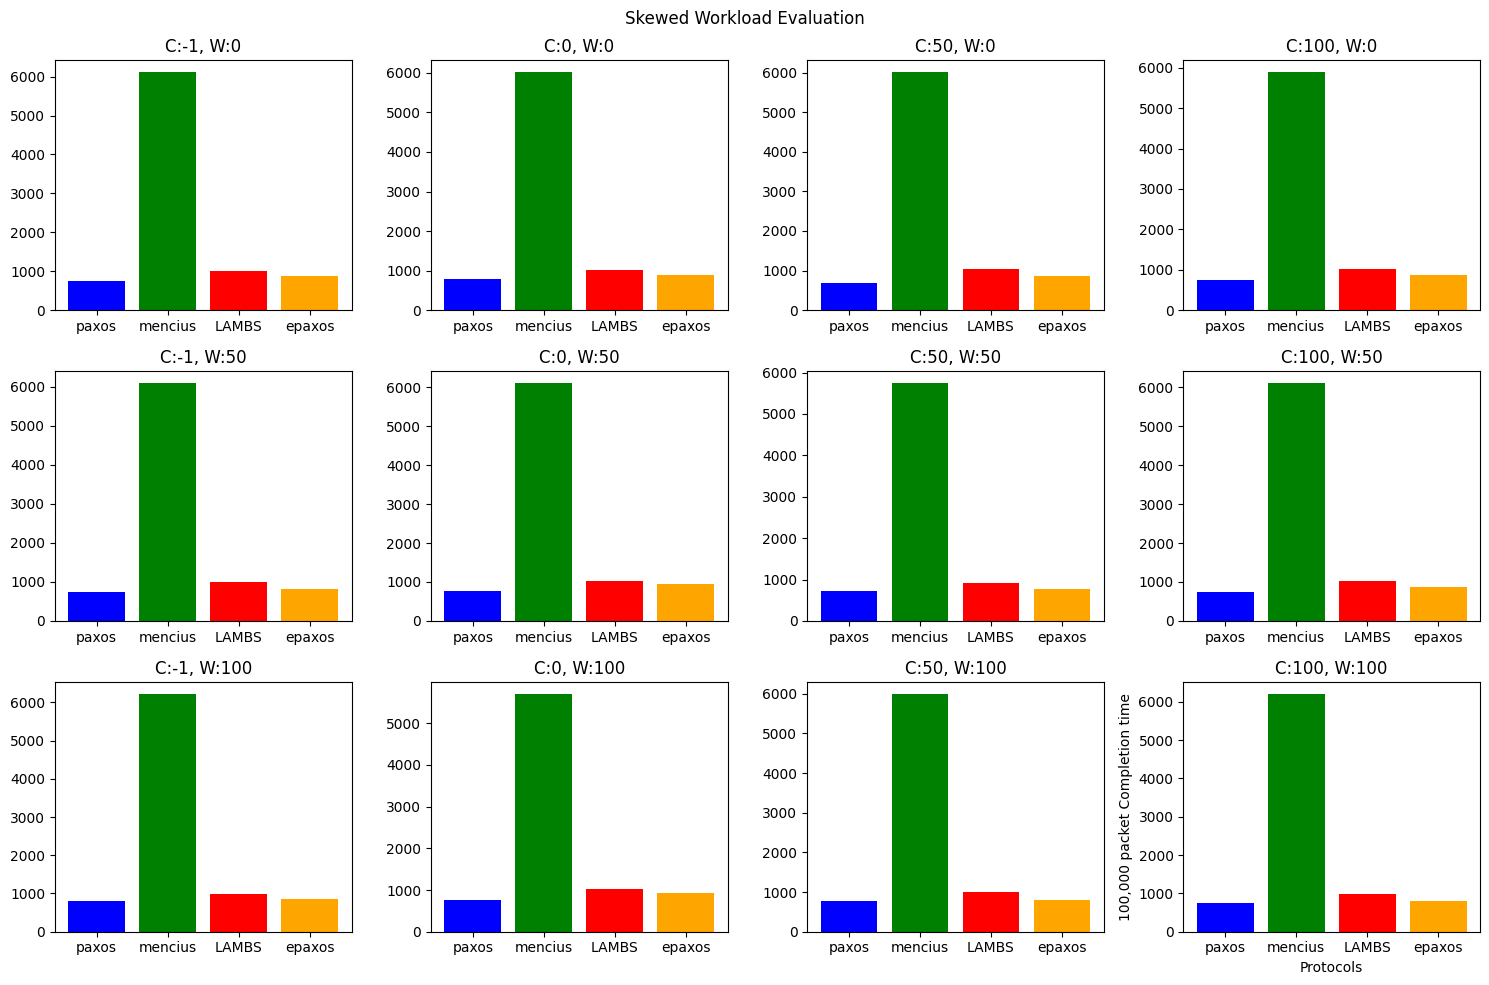

In [70]:
plot_eval("skewed_workload_paxos.json", "skewed_workload_mencius.json", "skewed_workload_lambs.json", "skewed_workload_epaxos.json")

/tmp/ipykernel_300106/419533308.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, j].set_xticklabels(expt_labels, rotation=0)  # Adjust rotation for long labels
/tmp/ipykernel_300106/419533308.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, j].set_xticklabels(expt_labels, rotation=0)  # Adjust rotation for long labels
/tmp/ipykernel_300106/419533308.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, j].set_xticklabels(expt_labels, rotation=0)  # Adjust rotation for long labels
/tmp/ipykernel_300106/419533308.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, j].set_xticklabels(expt_labels, rotation=0)  # Adjust r

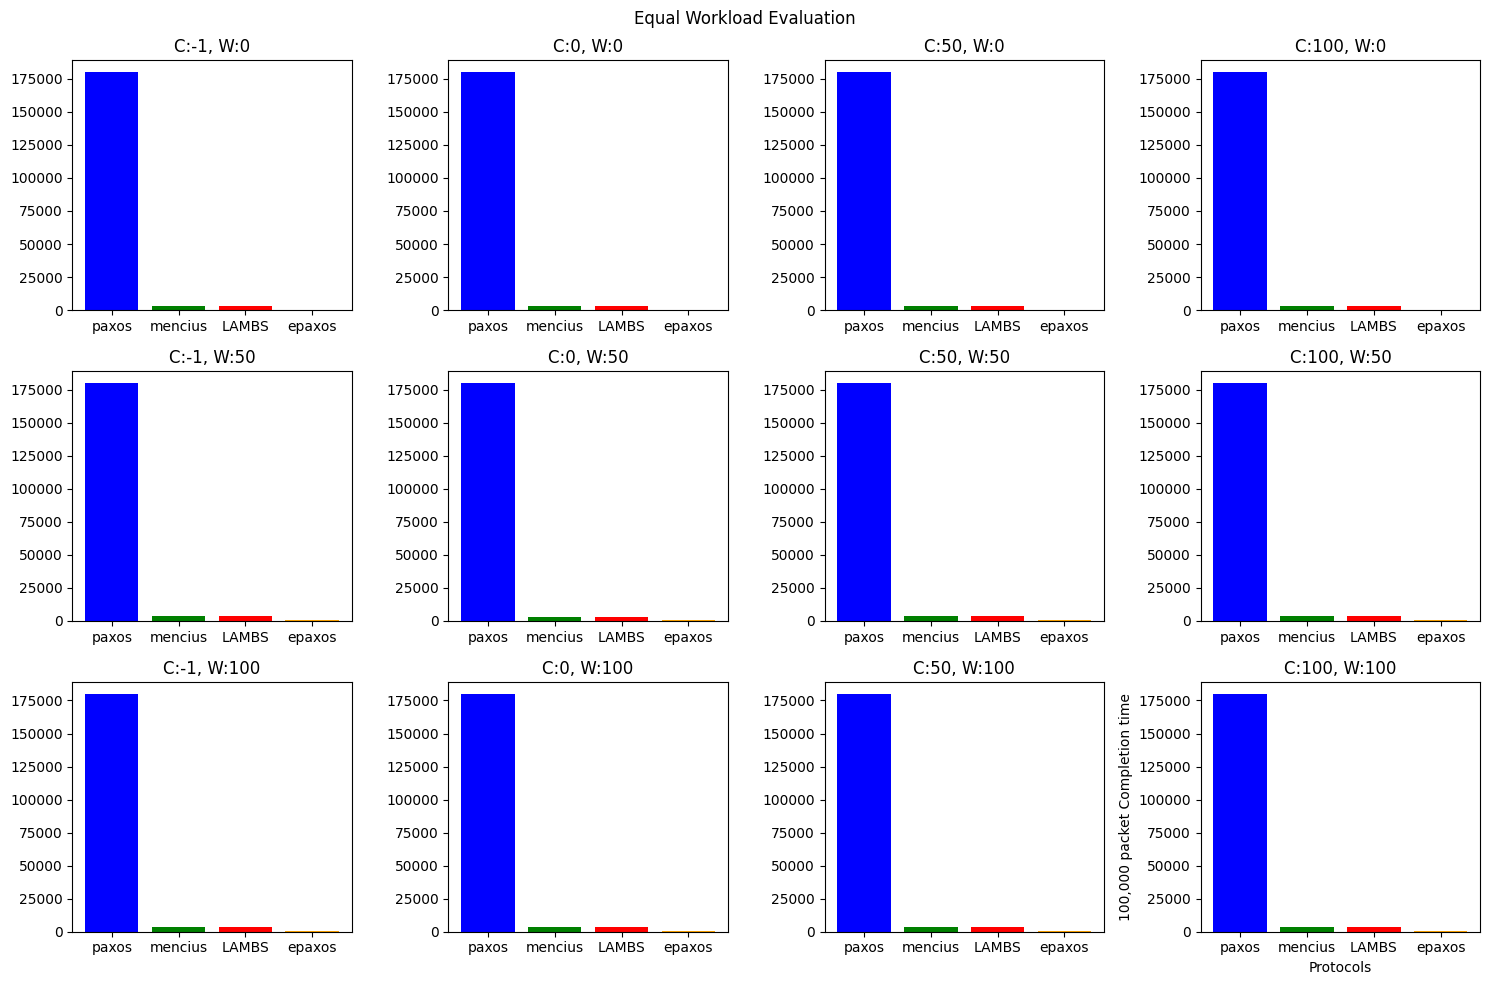

In [72]:
plot_eval("egal_workload_paxos.json", "egal_workload_mencius.json", "egal_workload_lambs.json", "egal_workload_epaxos.json")

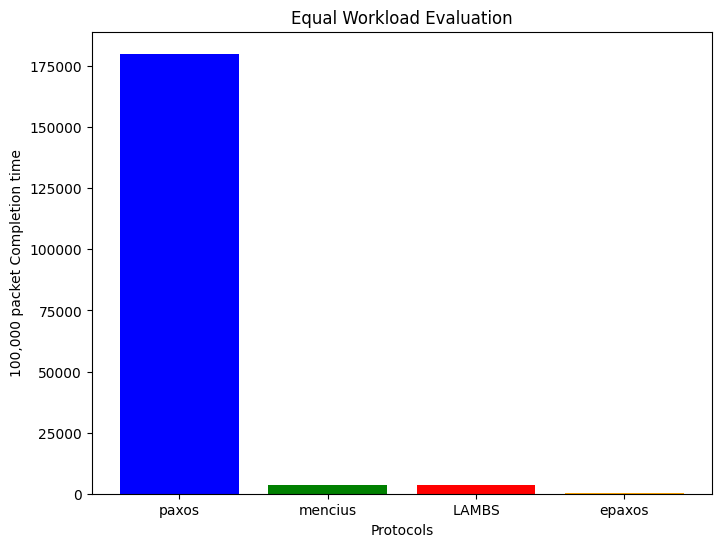

In [45]:
# Extract experiment data for all protocols
paxos_expts = extract_experiments("egal_workload_paxos.json")
mencius_expts = extract_experiments("egal_workload_mencius.json")
bug_mencius_expts = extract_experiments("egal_workload_lambs.json")
epaxos_expts = extract_experiments("egal_workload_epaxos.json")

# aggregate different expts into format for plotting
aggregate_expts = aggregate_experiment(paxos_expts, mencius_expts, bug_mencius_expts, epaxos_expts)

# plot specific experiment of interest
plot_expt("100,100", aggregate_expts)